# EDA for Image Datset

#### Data Overview

In [2]:
import os
from collections import defaultdict

dataset_path = "C:/Users/moham/Desktop/Data Mining and ML/Plant images"

# Explore the structure
def explore_dataset_structure(dataset_path):
    folder_counts = defaultdict(int)
    total_images = 0
    
    for root, dirs, files in os.walk(dataset_path):
        if files:
            folder_name = os.path.basename(root)
            image_count = len([file for file in files if file.endswith(('jpg', 'jpeg', 'png'))])
            folder_counts[folder_name] += image_count
            total_images += image_count
    
    print("Directory Structure Overview:")
    for folder, count in folder_counts.items():
        print(f"Folder: {folder}, Number of Images: {count}")
    print(f"Total Images in Dataset: {total_images}")

explore_dataset_structure(dataset_path)


Directory Structure Overview:
Folder: Cerscospora, Number of Images: 7681
Folder: Healthy, Number of Images: 18983
Folder: Leaf rust, Number of Images: 8336
Folder: Miner, Number of Images: 16978
Folder: Phoma, Number of Images: 6571
Total Images in Dataset: 58549


#### Image Formats and Dimensions

In [3]:
# Collect image stats
def image_stats(dataset_path):
    formats = defaultdict(int)
    dimensions = defaultdict(int)
    
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        formats[img.format] += 1
                        dimensions[img.size] += 1
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

    print("Image Formats and Counts:")
    for fmt, count in formats.items():
        print(f"{fmt}: {count}")
    
    print("\nImage Dimensions and Counts:")
    for dim, count in dimensions.items():
        print(f"{dim}: {count}")

image_stats(dataset_path)


Image Formats and Counts:
JPEG: 58549

Image Dimensions and Counts:
(83, 128): 1
(128, 128): 55596
(256, 120): 128
(256, 99): 96
(256, 126): 96
(122, 256): 224
(116, 256): 128
(104, 256): 120
(108, 256): 96
(94, 256): 128
(113, 256): 128
(92, 256): 128
(123, 256): 96
(256, 112): 96
(256, 125): 128
(96, 256): 32
(111, 256): 88
(119, 256): 56
(126, 256): 32
(100, 256): 32
(102, 256): 64
(86, 256): 32
(101, 256): 32
(80, 256): 32
(125, 256): 64
(82, 256): 32
(103, 256): 64
(89, 256): 32
(117, 256): 32
(114, 256): 64
(256, 87): 32
(256, 98): 32
(256, 90): 32
(124, 256): 32
(105, 256): 32
(109, 256): 64
(74, 256): 32
(93, 256): 32
(118, 256): 32
(256, 108): 32
(256, 124): 32
(256, 110): 32
(256, 111): 64
(256, 127): 32
(256, 114): 32
(256, 91): 32
(256, 116): 32
(256, 102): 32
(256, 118): 32


#### Class Distribution

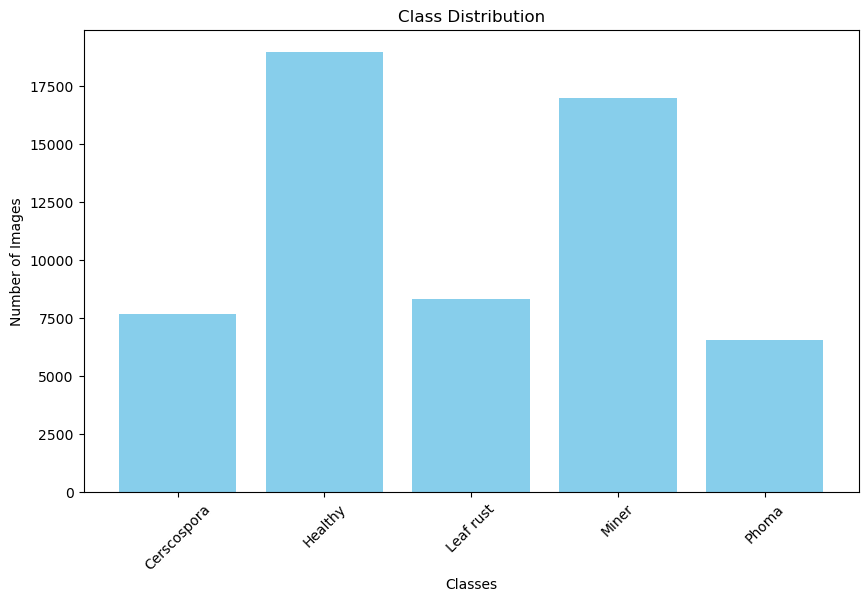

In [8]:
# Plot class distribution
def plot_class_distribution(dataset_path):
    class_counts = defaultdict(int)
    
    for root, dirs, files in os.walk(dataset_path):
        if files:
            folder_name = os.path.basename(root)
            class_counts[folder_name] += len([file for file in files if file.endswith(('jpg', 'jpeg', 'png'))])
    
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(dataset_path)


#### Image Visualization

Class: Cerscospora


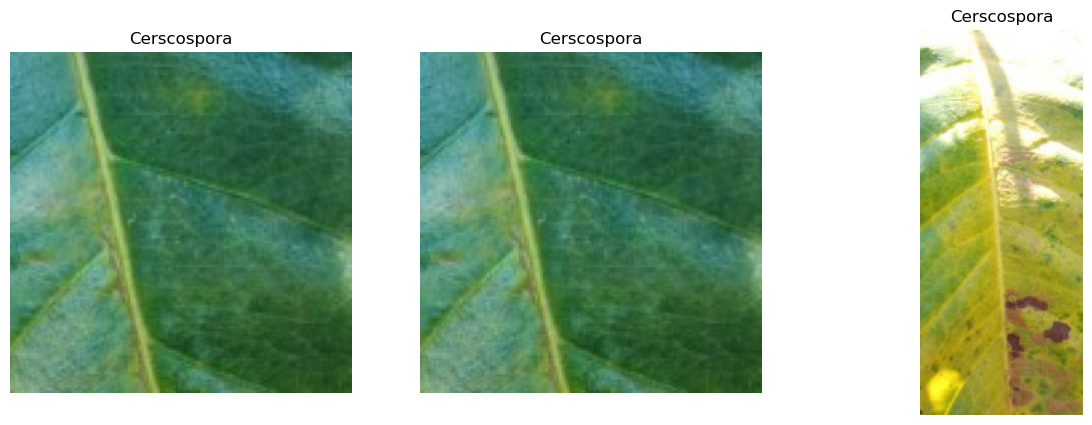

Class: Healthy


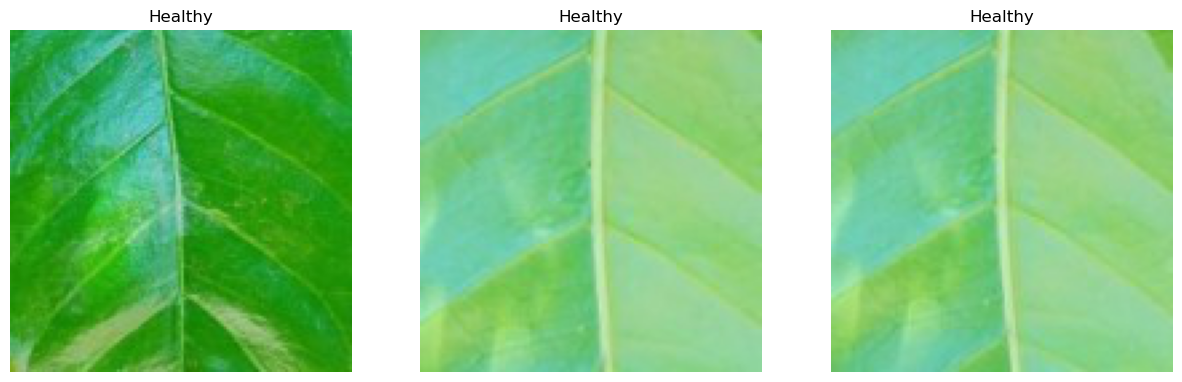

Class: Leaf rust


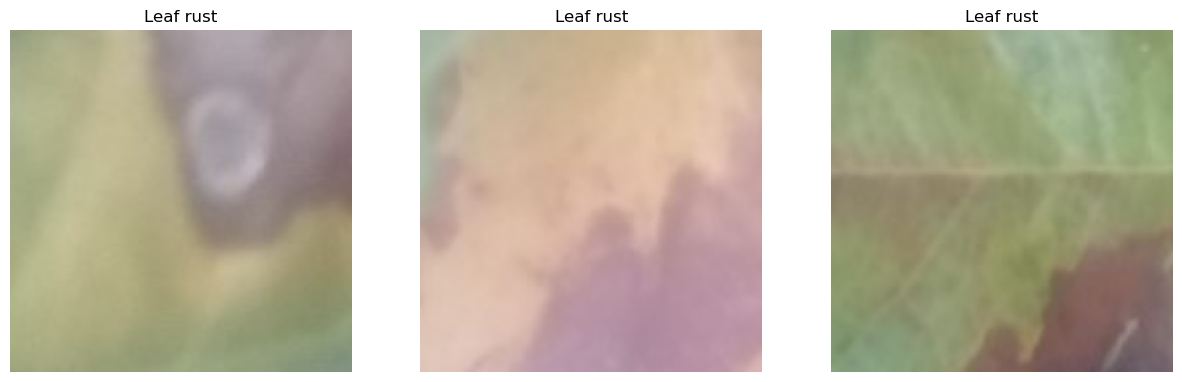

Class: Miner


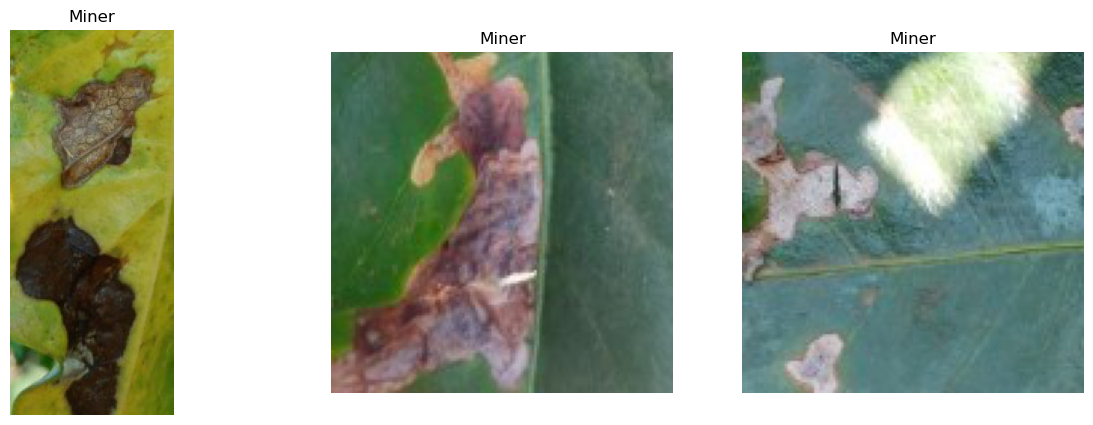

Class: Phoma


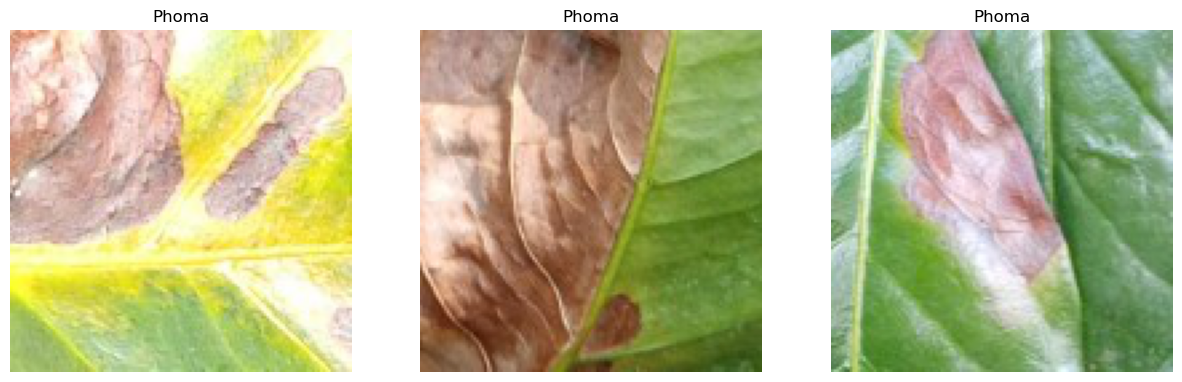

In [7]:

# Visualize random images
def visualize_images(dataset_path, samples_per_class=3):
    for root, dirs, files in os.walk(dataset_path):
        if files:
            folder_name = os.path.basename(root)
            print(f"Class: {folder_name}")
            sample_files = random.sample([file for file in files if file.endswith(('jpg', 'jpeg', 'png'))], 
                                         min(samples_per_class, len(files)))
            
            plt.figure(figsize=(15, 5))
            for i, file in enumerate(sample_files):
                file_path = os.path.join(root, file)
                try:
                    img = Image.open(file_path)
                    plt.subplot(1, samples_per_class, i + 1)
                    plt.imshow(img)
                    plt.axis('off')
                    plt.title(folder_name)
                except Exception as e:
                    print(f"Error visualizing {file_path}: {e}")
            plt.show()

visualize_images(dataset_path)
